# Correlación Estadística

In [23]:
import pandas as pd

In [24]:
data_ads = pd.read_csv('../datasets/ads/Advertising.csv')
data_ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Coeficiente de correlación de Pearson

In [25]:
import numpy as np
from IPython.display import Image

Creación de una columna con la correlación de Pearson entre TV y Sales. Este coeficiente mide como nos alejamos de los extremos

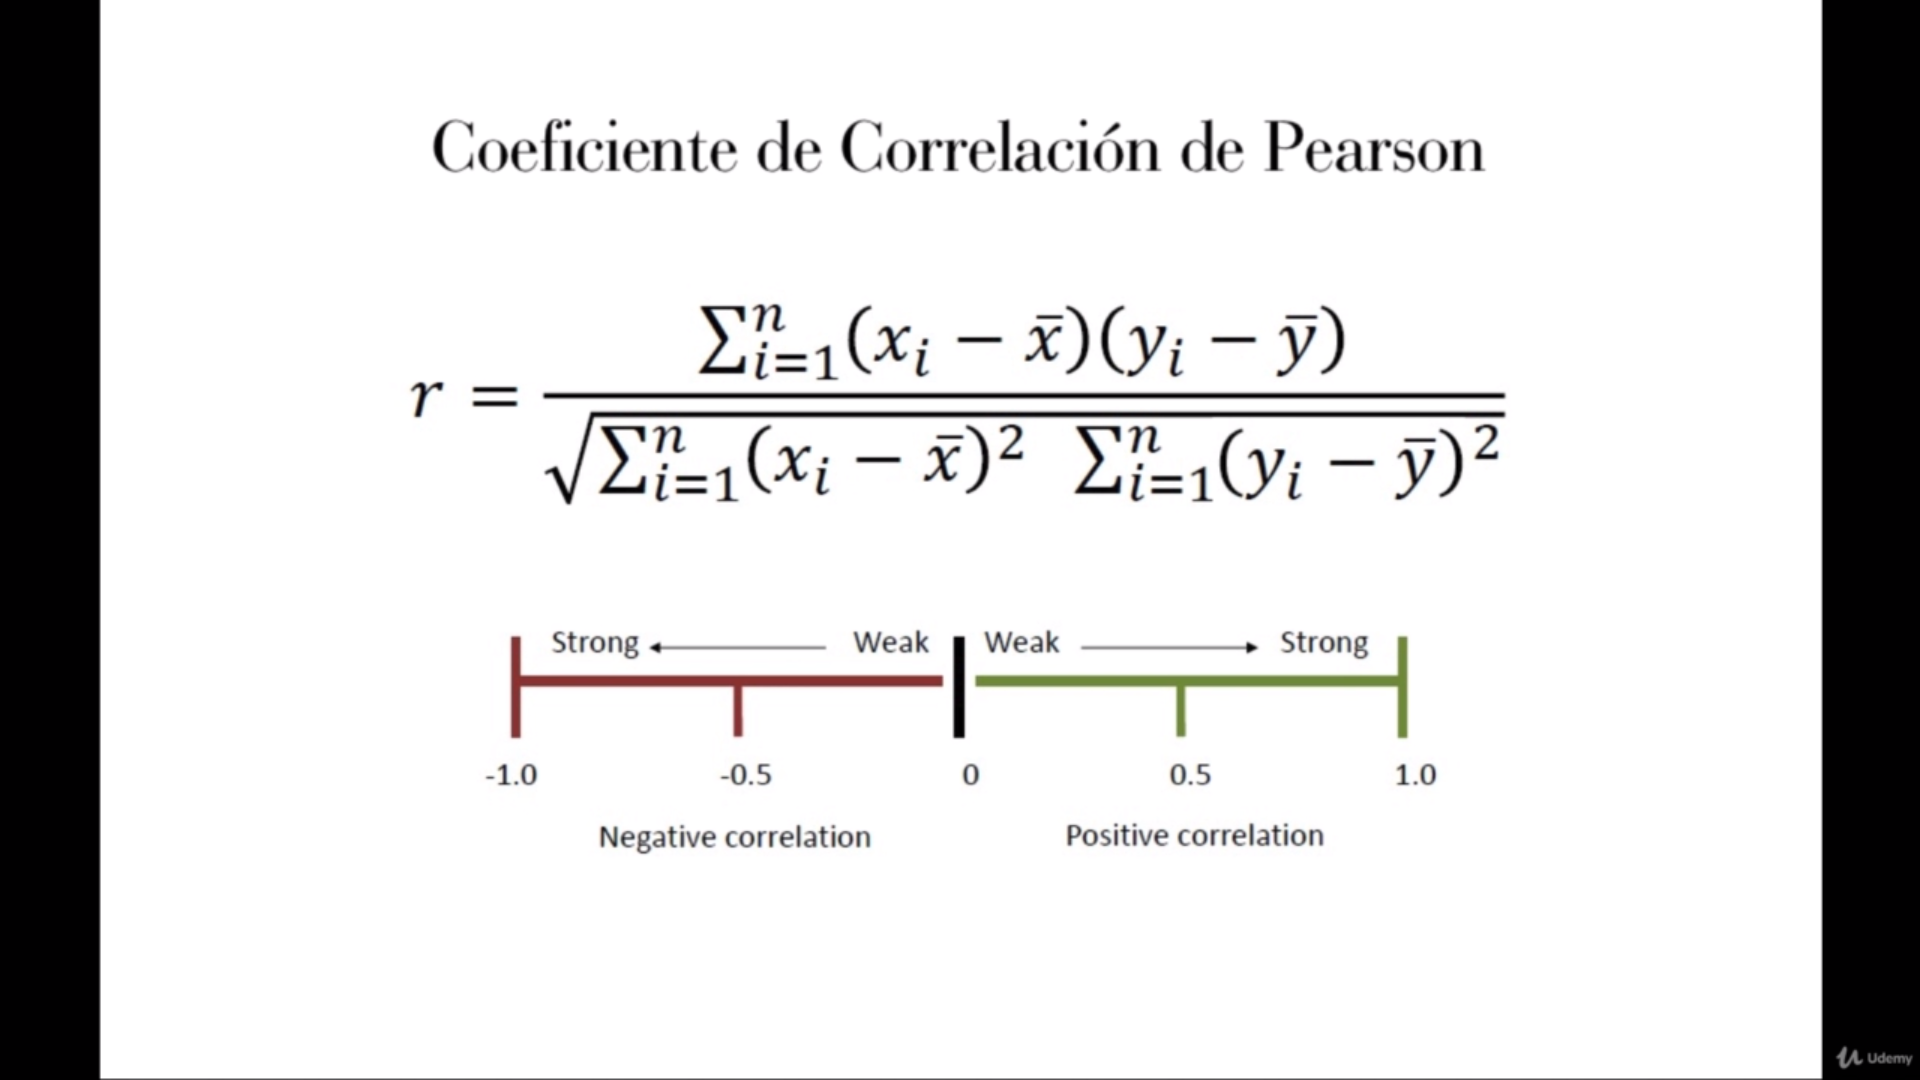

In [26]:
Image(filename='../Imagenes/pearson_cor.png')

In [27]:
# Numerador
corrn = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))
# Denominador
corr1 = (data_ads["TV"] - np.mean(data_ads["TV"]))**2
corr2 = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2
# Calculo
corrn = sum(corrn)/np.sqrt(sum(corr1) * sum(corr2))
corrn

0.782224424861606

Se puede concluir que el gasto en publicidad de TV es rentable ya que la correlación con las ventas es positiva y además cercana a 1

### Función para realizar el calculo

In [31]:
from copy import copy
def corr_coeff(df, var1, var2):
    df = copy(df) # copy original dataframe
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [32]:
corr_coeff(data_ads,'TV','Sales')

0.782224424861606

Calculo de todas las correlaciones utilizando la funcion

In [33]:
cols = data_ads.columns.values
for x in cols:
    for y in cols:
        if x != y and y == 'Sales':
            print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))


TV, Sales : 0.782224424861606
Radio, Sales : 0.576222574571055
Newspaper, Sales : 0.22829902637616534


Algunas correlaciones no tienen mucho sentido, porque en este caso lo que nos interesa comparar es el tipo de publicidad con las ventas. Por ejemplo, un tipo de publicidad con otro tipo de publicidad no tiene mucho sentido compararlos. Por esta razon, se realiza la condición y así solo se realiza la correlación de los 3 tipos de publicidad con las ventas.

## Correlación gráfica

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en publicidad TV vs Ventas del Producto')

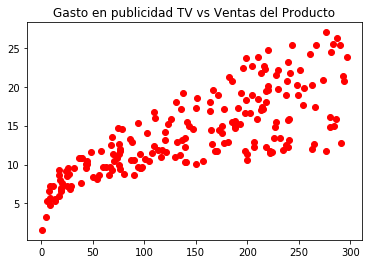

In [41]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en publicidad TV vs Ventas del Producto")

Se puede ver que a mayor gasto en publicidad de TV mayores ventas

Text(0.5, 1.0, 'Gasto en publicidad Radio vs Ventas del Producto')

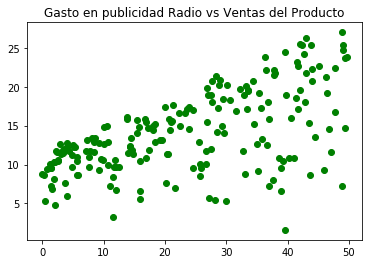

In [42]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en publicidad Radio vs Ventas del Producto")

Hay una mayor dispersión que en el gráfico anterior, por lo tanto no se puede establecer una correlación tan clara

Text(0.5, 1.0, 'Gasto en publicidad Newspaper vs Ventas del Producto')

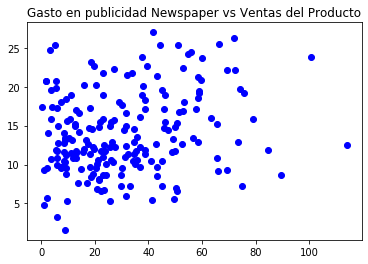

In [43]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en publicidad Newspaper vs Ventas del Producto")

Aún mayor dispersión, porque hay una correlación muy baja (0.20)

## Calcular matriz de correlación

In [44]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


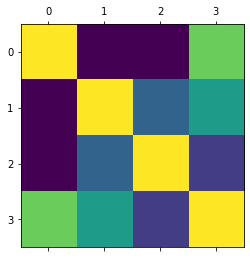

In [45]:
plt.matshow(data_ads.corr())

El amarillo sería la máxima correlación, porque es la diagonal (comparación entre la misma variable). El verde sería una correlación bastante positiva y el resto de colores serían correlaciones más bajas, cuanto más oscuro el color menos correlación